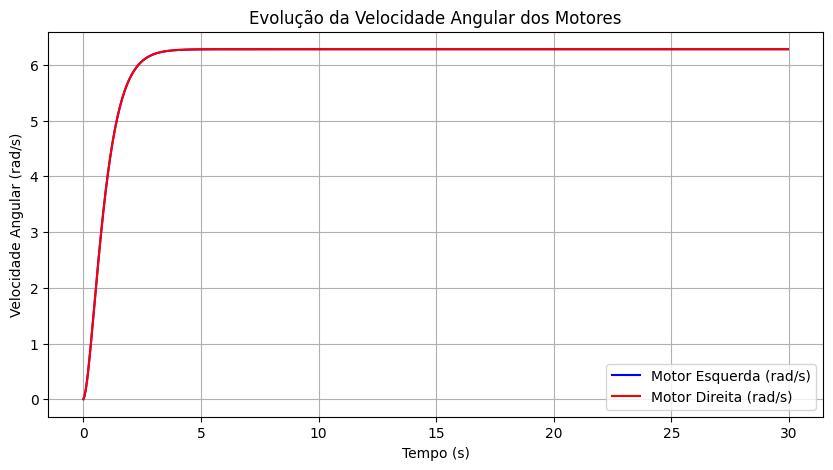

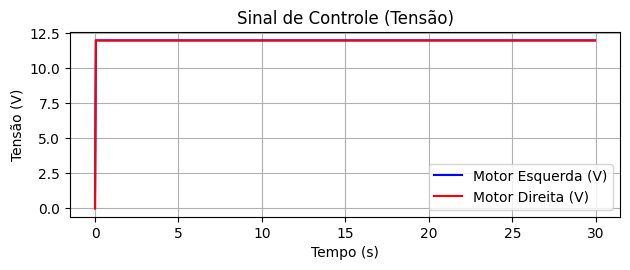

In [ ]:
##################
####  2 - a)  ####
##################
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do motor
J = 0.01  # Momento de inércia (kg.m^2)
b = 0.019  # Atrito viscoso (N.m.s)
Ke = 0.01  # Constante de força eletromotriz (V/(rad/s))
Kt = 0.01  # Constante de torque do motor (N.m/Amp)
R = 1.0    # Resistência Elétrica (Ohm)
L = 0.5    # Indutância Elétrica (H)
v_max = 12.0  # Tensão máxima (V)

# Controlador PID
Kp = 10.0
Ki = 1.0
Kd = 0.02

# Tempo de simulação
dt = 0.05  # Intervalo de tempo discreto (s)
tf = 30.0  # Tempo final da simulação (s)
t = np.arange(0.0, tf, dt)  # Vetor de tempo

# Velocidade angular de referência (rad/s)
theta_dot_ref = 3 * np.pi    # velocidade de referência desejada

# Vetores para armazenar os estados
theta_dot_left = np.zeros(len(t))
theta_dot_right = np.zeros(len(t))
current_left = np.zeros(len(t))
current_right = np.zeros(len(t))
v_left = np.zeros(len(t))
v_right = np.zeros(len(t))
error_left = np.zeros(len(t))
error_right = np.zeros(len(t))
integral_left = 0.0
integral_right = 0.0

# Condições iniciais
theta_dot_left[0] = 0.0
theta_dot_right[0] = 0.0
current_left[0] = 0.0
current_right[0] = 0.0

# Simulação
for k in range(1, len(t)):
    # Erros Controlador PID
    error_left[k] = theta_dot_ref - theta_dot_left[k-1]
    error_right[k] = theta_dot_ref - theta_dot_right[k-1]

    # Integral do erro
    integral_left += error_left[k] * dt
    integral_right += error_right[k] * dt

    # Derivadas dos erros
    derivative_left = (error_left[k] - error_left[k-1]) / dt
    derivative_right = (error_right[k] - error_right[k-1]) / dt

    # Controlador PID para a tensão de entrada (v)
    v_left[k] = Kp * error_left[k] + Ki * integral_left + Kd * derivative_left
    v_right[k] = Kp * error_right[k] + Ki * integral_right + Kd * derivative_right

    # Limitar a tensão ao valor máximo
    v_left[k] = np.clip(v_left[k], -v_max, v_max)
    v_right[k] = np.clip(v_right[k], -v_max, v_max)

    # Equações diferenciais dos motores (simplificadas para Euler)

    # Motor da Esquerda
    di_left = (v_left[k] - R * current_left[k-1] - Ke * theta_dot_left[k-1]) / L * dt
    current_left[k] = current_left[k-1] + di_left

    d_theta_dot_left = (Kt * current_left[k] - b * theta_dot_left[k-1]) / J * dt
    theta_dot_left[k] = theta_dot_left[k-1] + d_theta_dot_left

    # Motor da Direita
    di_right = (v_right[k] - R * current_right[k-1] - Ke * theta_dot_right[k-1]) / L * dt
    current_right[k] = current_right[k-1] + di_right

    d_theta_dot_right = (Kt * current_right[k] - b * theta_dot_right[k-1]) / J * dt
    theta_dot_right[k] = theta_dot_right[k-1] + d_theta_dot_right

# Plotagem da evolução da velocidade angular
plt.figure(figsize=(10, 5))
plt.plot(t, theta_dot_left, label='Motor Esquerda (rad/s)', color='b')
plt.plot(t, theta_dot_right, label='Motor Direita (rad/s)', color='r')
plt.title('Evolução da Velocidade Angular dos Motores')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade Angular (rad/s)')
plt.grid()
plt.legend()
plt.show()

# Plotagem do sinal de controle (tensão)
plt.subplot(2, 1, 2)
plt.plot(t, v_left, label='Motor Esquerda (V)', color='b')
plt.plot(t, v_right, label='Motor Direita (V)', color='r')
plt.title('Sinal de Controle (Tensão)')
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão (V)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

2 - b) A resposta não é instantânea, isso devido às características do sistema. A resposta é gradual, e depende de fatores como a inércia, o atrito viscoso, a dinâmica elétrica do motor e a ação do controlador PID. Quando aplicamos uma tensão ao motor, a velocidade angular aumenta gradualmente até atingir a referência desejada. No gráfico é possível visualizar que a velocidade não salta imediatamente para a referência, há um tempo de subida até que o sistema estabilize na velocidade desejada.

2 - c) 5 segundos

2 - d) Para gerar um sinal de tensão a partir de um controlador PID na prática, podemos utilizar uma combinação de hardware e técnicas de controle. Utilizando abordagens como o uso de microcontroladores, conversores digital-analógico (DAC), PMW, Amplificadores operacionais, etc.